## **CNN based Covid Detection using Chest X-Ray.**

- Covid positive chest X-Ray images from https://github.com/ieee8023/covid-chestxray-dataset 
- Normal chest X-Ray images from Kaggle dataset https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia 
- Here we have taken equal number of normal and covid positive images to build our CNN model.

In [1]:
# importing data from dropbox
!wget http://cb.lk/covid_19

--2021-08-20 13:49:45--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-08-20 13:49:45--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-08-20 13:49:45--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-0

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
# Creating file paths.
TRAIN_PATH='CovidDataset/Train'
VALID_PATH='CovidDataset/Val'

In [4]:
# importing required libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import keras
from keras.layers import *
from keras.preprocessing import image
from keras.models import *

In [5]:
# Building CNN models
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
# training the model : Augmentation
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset=image.ImageDataGenerator(rescale=1./255)


In [8]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator=test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [12]:
# fitting the model.
hist = model.fit(
    train_generator,
    #steps_per_epoch=8,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/20
7/7 [==============================] - 11s 2s/step - loss: 1.1603 - accuracy: 0.6027 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6438 - accuracy: 0.5982 - val_loss: 0.6125 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.4957 - accuracy: 0.7321 - val_loss: 0.4376 - val_accuracy: 0.9500
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.3301 - accuracy: 0.8393 - val_loss: 0.2411 - val_accuracy: 0.9500
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.3998 - accuracy: 0.8438 - val_loss: 0.3175 - val_accuracy: 0.9667
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3064 - accuracy: 0.8705 - val_loss: 0.1919 - val_accuracy: 0.9833
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2293 - accuracy: 0.9018 - val_loss: 0.1332 - val_accuracy: 0.9667
Epoch 8/20
7/7 [========================

In [13]:
model.save('CovidDetector.h5')

In [14]:
model.evaluate(train_generator)

7/7 [==============================] - 7s 957ms/step - loss: 0.1321 - accuracy: 0.9464


[0.1320997029542923, 0.9464285969734192]

In [15]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 837ms/step - loss: 0.0896 - accuracy: 0.9667


[0.0896487757563591, 0.9666666388511658]

In [16]:
model=load_model('CovidDetector.h5')

In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:
y_actual,y_test=[],[]

In [19]:
for i in os.listdir('./CovidDataset/Val/Normal/'):
  img=image.load_img('./CovidDataset/Val/Normal/'+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [20]:
for i in os.listdir('./CovidDataset/Val/Covid/'):
  img=image.load_img('./CovidDataset/Val/Covid/'+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [21]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [27]:
# confusion matrix
conf_matrix=confusion_matrix(y_actual,y_test)

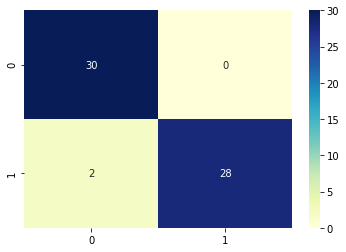

In [28]:
sns.heatmap(conf_matrix,annot=True,cmap="YlGnBu")
plt.show()

In [29]:
# sensitivity and specificity for validation data.
sensitivity_train=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print('sensitivity = %f'%sensitivity_train)
specificity_train=conf_matrix[0,0]/(conf_matrix[0,1]+conf_matrix[0,0])
print('specificity = %f'%specificity_train)

sensitivity = 0.933333
specificity = 1.000000


## **Conclusion.**
- **As we can see our model has achieved `100%` specificity which indicates all the covid positive cases were detected correctly.**
- **Also the sensitivity is `93.33%` where two normal cases were detected as covid positive.**
- **As per our problem statement here requires high value of specificity which implies that it is crucial to detect covid positive cases correctly but we can compromise little bit on sensitivity where a normal case is detected as covid positive.**